<a href="https://colab.research.google.com/github/oledunwahid/Kuramen_Responsive/blob/main/TUGASPREPROCESSINGDATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib seaborn

# New Section

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data (1).csv
Shape sebelum menghapus duplikat: (5110, 12)
Shape setelah menghapus duplikat: (5110, 12)
Shape setelah menghapus outliers: (4253, 12)

Missing values sebelum penanganan:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Missing values setelah penanganan:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Kolom yang dihapus karena hanya memiliki satu nilai unik: []
Kolom yang dihapus karena tidak representatif: ['id']

Informasi data

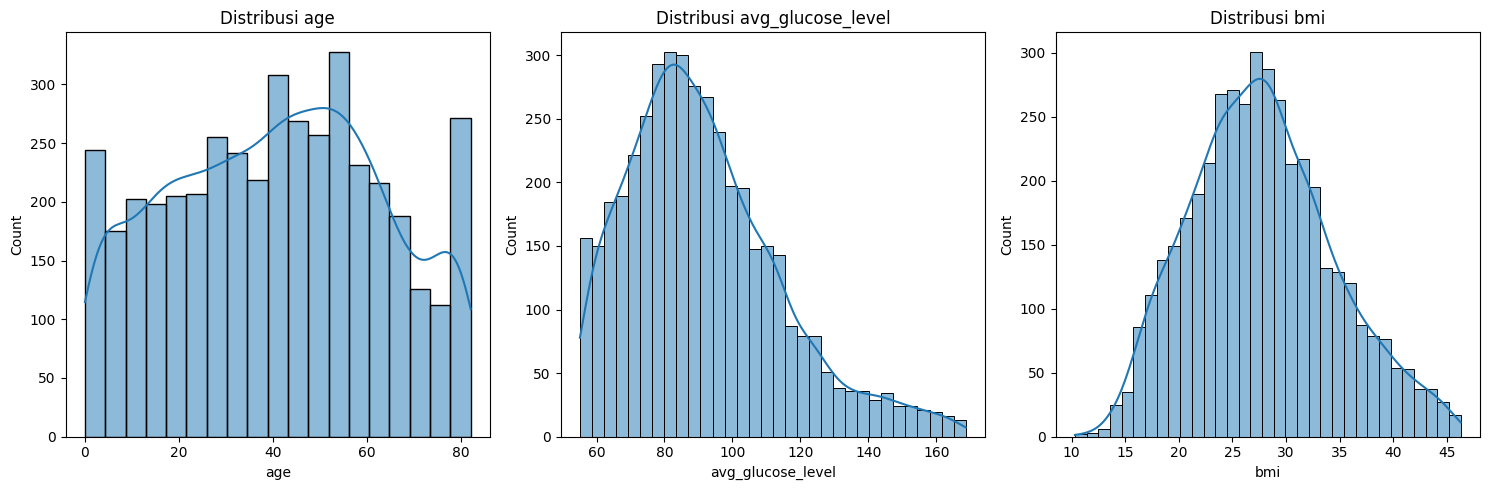

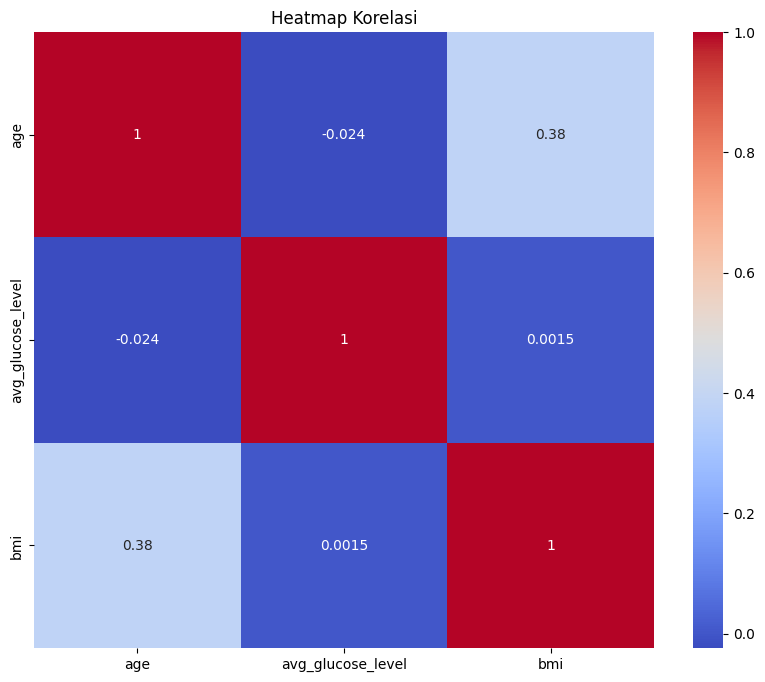

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Dataset yang telah dibersihkan disimpan sebagai 'cleaned_healthcare_dataset.csv' dan diunduh


In [2]:
# Import pustaka yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload file CSV Anda
uploaded = files.upload()

# Baca file CSV yang diupload
filename = next(iter(uploaded))
df = pd.read_csv(filename)

# 1. Identifikasi dan hapus data duplikat
print("Shape sebelum menghapus duplikat:", df.shape)
df.drop_duplicates(inplace=True)
print("Shape setelah menghapus duplikat:", df.shape)

# 2. Identifikasi dan hapus outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

numerical_columns = ['age', 'avg_glucose_level', 'bmi']
for col in numerical_columns:
    df = remove_outliers(df, col)

print("Shape setelah menghapus outliers:", df.shape)

# 3. Identifikasi dan tangani missing values
print("\nMissing values sebelum penanganan:")
print(df.isnull().sum())

# Ganti 'N/A' dengan NaN
df = df.replace('N/A', np.nan)

# Tangani missing values
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

print("\nMissing values setelah penanganan:")
print(df.isnull().sum())

# 4. Hapus kolom yang hanya memiliki satu nilai
single_value_columns = [col for col in df.columns if df[col].nunique() == 1]
df.drop(columns=single_value_columns, inplace=True)
print("\nKolom yang dihapus karena hanya memiliki satu nilai unik:", single_value_columns)

# 5. Hapus kolom yang tidak representatif
non_representative_columns = ['id']  # Tambahkan kolom lain yang Anda anggap tidak representatif
df.drop(columns=non_representative_columns, inplace=True)
print("Kolom yang dihapus karena tidak representatif:", non_representative_columns)

# Tampilkan informasi dataset akhir
print("\nInformasi dataset akhir:")
print(df.info())

# Visualisasikan distribusi fitur numerik
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_columns):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

# Visualisasikan korelasi antara fitur numerik
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

# Simpan dataset yang telah dibersihkan
df.to_csv('cleaned_healthcare_dataset.csv', index=False)
files.download('cleaned_healthcare_dataset.csv')
print("\nDataset yang telah dibersihkan disimpan sebagai 'cleaned_healthcare_dataset.csv' dan diunduh")